# S04 T01: Transformació Registre Log amb Regular expressions

#### David Arroyo

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import math
from ip2geotools.databases.noncommercial import DbIpCity

In [2]:
with open ('Datos\Web_access_log-akumenius.com.txt', 'r') as file:
    lines_list = []
    for line in file:
        line_string = line.strip()
        lines_list.append(line_string)

In [3]:
log_df = pd.DataFrame([lines_list]).T

In [4]:
log_df.shape

(261873, 1)

In [5]:
log_df.rename(columns = {0:'Record'}, inplace = True)

In [6]:
log_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261873 entries, 0 to 261872
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Record  261873 non-null  object
dtypes: object(1)
memory usage: 2.0+ MB


In [7]:
'''
Function to verify weather a pattern is found in a column of a data frame. 

Inputs: 
patern:  Regular expression in a string format
df: Dataframe to be used
column: Name of the column where we want to perform the search

Outputs:
Added column named 'Result'. Boolean, True or False 
Added column named 'itemFound'. Item found or None, in case no item matches the pattern
Added column named 'matchStart'. Starting position of the string matched or None, in case no item matches the pattern
Added column named 'matchEnd'. Ending position of the string matched or None, in case no item matches the pattern

'''

def serch_pattern (pattern, df, column):
    
    serched_list = df[column].tolist()
    result_list = []
    serched_item_list = []
    match_start_list = []
    match_end_list = []

    for string in serched_list:
        serched_item = re.search(pattern, string)
        
        if serched_item:
            result_list.append (True)
            serched_item_list.append(serched_item.group(0))
            match_start_list.append (serched_item.start())
            match_end_list.append (serched_item.end())
        else:
            result_list.append (False)
            serched_item_list.append(None) 
            match_start_list.append (None)
            match_end_list.append (None)
    
    df['Result'] = result_list
    df['itemFound'] = serched_item_list
    df['matchStart'] = match_start_list
    df['matchEnd'] = match_end_list
         

In [8]:
# Test df to validate the different metodologies used to clean and transform the final DF

test_df = log_df.loc[:1000, 'Record'].to_frame()


In [9]:
test_df.head()

,Record
0,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
1,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
2,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
3,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
4,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...


#### Eliminate rows not starting with a web page pattern

In [10]:
web_pattern = '^([a-z0-9][a-z0-9\-]*\.)+([a-z0-9][a-z0-9\-]*)'

In [11]:
serch_pattern (web_pattern,test_df,'Record')

In [12]:
test_df.drop(test_df.loc[test_df['Result']== False].index, inplace=True)

In [13]:
test_df.head()

,Record,Result,itemFound,matchStart,matchEnd
22,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,True,www.akumenius.com,0.0,17.0
23,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,True,www.akumenius.com,0.0,17.0
24,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,True,www.akumenius.com,0.0,17.0
25,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,True,www.akumenius.com,0.0,17.0
26,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,True,www.akumenius.com,0.0,17.0


#### Eliminate not usefull columns and Rename 'itemFound' Column


In [14]:
test_df.drop(columns = ['Result', 'matchStart', 'matchEnd'], inplace = True)

In [15]:
test_df.rename(columns = {'itemFound': 'WebPage'}, inplace = True)

#### New column with IP addresses
Split the Record line into 3 parts separated by white spaces. The second item would match the IP Adresses.

In [16]:
serched_list = test_df['Record'].tolist()

In [17]:
ipAdresses_list = []

for row in serched_list:
    list_row = re.split('\s', row ,2)
    ipAdresses_list.append (list_row [1])

In [18]:
# Add ipAdresses_List to the the df
test_df ['IPAdress'] = ipAdresses_list

In [19]:
test_df.head()

,Record,WebPage,IPAdress
22,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216
23,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216
24,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216
25,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216
26,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216


In [20]:
# Make sure all the obtaided values in the IPAdress column have the IP format. IP Adress are a sequence of 4 numbers,
# separated by dots '.'

ipPattern = '^\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}$'

serch_pattern (ipPattern, test_df, 'IPAdress')

In [21]:
test_df.head()

,Record,WebPage,IPAdress,Result,itemFound,matchStart,matchEnd
22,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,True,66.249.76.216,0,13
23,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,True,66.249.76.216,0,13
24,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,True,66.249.76.216,0,13
25,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,True,66.249.76.216,0,13
26,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,True,66.249.76.216,0,13


In [22]:
# Eliminate rows with iligal IP Adress

test_df.drop(test_df.loc[test_df['Result']== False].index, inplace=True)


In [23]:
test_df.drop(columns = ['Result','itemFound', 'matchStart', 'matchEnd'], inplace = True)

#### To separate date from each row

In [24]:
date_list = []

for string in serched_list:
    date_start_position = string.find('[')
    date_end_position = string.find(']')
    date_string = string[date_start_position+1:date_end_position]
    date_dateTime = datetime.strptime(date_string,'%d/%b/%Y:%H:%M:%S %z')
    date_list.append(date_dateTime)

In [25]:
# Add datetime list to the Data Frame

test_df ['Date'] = date_list

In [26]:
test_df.head()

,Record,WebPage,IPAdress,Date
22,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,2014-02-23 03:10:31+01:00
23,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,2014-02-23 03:10:33+01:00
24,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,2014-02-23 03:10:35+01:00
25,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,2014-02-23 03:10:38+01:00
26,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,2014-02-23 03:10:39+01:00


#### To find the destination in each search

In [27]:
previous_destination_pattern = '(\-hotel.*\-en\-)|(\/hotel.*\-en\-)'

In [28]:
serch_pattern (previous_destination_pattern, test_df, 'Record')

In [29]:
test_df.head()

,Record,WebPage,IPAdress,Date,Result,itemFound,matchStart,matchEnd
22,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,2014-02-23 03:10:31+01:00,True,/hoteles-baratos/ofertas-hotel-Club-&-Hotel-Le...,70.0,127.0
23,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,2014-02-23 03:10:33+01:00,True,/hoteles-baratos/ofertas-hotel-Metropolis-Hote...,70.0,121.0
24,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,2014-02-23 03:10:35+01:00,True,/hoteles-baratos/ofertas-hotel-Faena-Hotel-Bue...,70.0,129.0
25,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,2014-02-23 03:10:38+01:00,True,/hoteles-baratos/ofertas-hotel-Kensington-Town...,70.0,132.0
26,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,2014-02-23 03:10:39+01:00,True,/hoteles-en-,105.0,117.0


In [30]:
# Find the destination, starting at the end position of the previous_destination_pattern up to the next '-'

In [31]:
destination_list = []
end_index_list = test_df ['matchEnd'].tolist()

for i in range (len(test_df)):
    string = serched_list [i]
    
    if math.isnan(end_index_list [i]):
        destination = None
        destination_list.append (destination)
    else: 
        start_index = int(end_index_list [i])
        end_index = string.find ('-',start_index)
        destination = string[start_index:end_index]
        destination_list.append (destination)
    

In [32]:
test_df ['Destination'] = destination_list

In [33]:
test_df.drop(columns = ['Result','itemFound', 'matchStart'], inplace = True)

In [34]:
test_df.head()


,Record,WebPage,IPAdress,Date,matchEnd,Destination
22,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,2014-02-23 03:10:31+01:00,127.0,Fethiye
23,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,2014-02-23 03:10:33+01:00,121.0,Kaunas
24,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,2014-02-23 03:10:35+01:00,129.0,Downtown
25,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,2014-02-23 03:10:38+01:00,132.0,Kensington
26,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,2014-02-23 03:10:39+01:00,117.0,Invermere_CANAD%C3%81


#### Geolocation of IP Addresses

In [35]:
ipAdresses_list = test_df ['IPAdress'].tolist()

In [36]:
request_country = []
request_region = []


for ip in ipAdresses_list:
    country = DbIpCity.get(ip, api_key='free').country
    region = DbIpCity.get(ip, api_key='free').region
    request_country.append (country)
    request_region.append (region)


In [37]:
test_df ['requestCountry'] = request_country
test_df ['requestRegion'] = request_region

In [38]:
test_df.head()

,Record,WebPage,IPAdress,Date,matchEnd,Destination,requestCountry,requestRegion
22,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,2014-02-23 03:10:31+01:00,127.0,Fethiye,US,California
23,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,2014-02-23 03:10:33+01:00,121.0,Kaunas,US,California
24,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,2014-02-23 03:10:35+01:00,129.0,Downtown,US,California
25,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,2014-02-23 03:10:38+01:00,132.0,Kensington,US,California
26,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,2014-02-23 03:10:39+01:00,117.0,Invermere_CANAD%C3%81,US,California


#### Plot of the distributions of requests by country

In [39]:
request_df = test_df.groupby(['requestCountry'], as_index = False).count()


In [40]:
request_df

,requestCountry,Record,WebPage,IPAdress,Date,matchEnd,Destination,requestRegion
0,CA,27,27,27,27,24,24,27
1,CN,45,45,45,45,44,44,45
2,DE,2,2,2,2,2,2,2
3,ES,5,5,5,5,0,0,5
4,FR,2,2,2,2,0,0,2
5,NL,1,1,1,1,1,1,1
6,RU,3,3,3,3,3,3,3
7,SE,3,3,3,3,3,3,3
8,US,888,888,888,888,809,809,888
9,VG,3,3,3,3,3,3,3


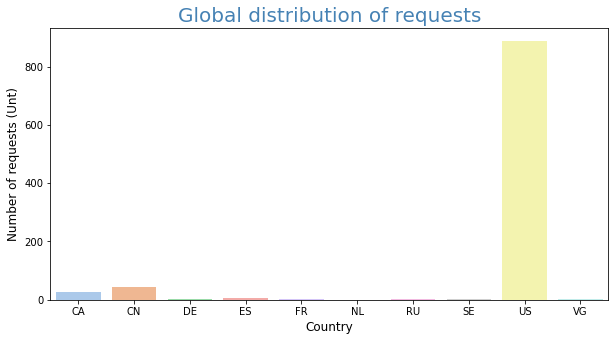

CONCLUION
US is, by far, the country with most requests recorded


In [41]:
plt.figure (figsize = (10,5))

sns.barplot (data = request_df, x = 'requestCountry', y = 'Record', palette="pastel" )

fuente_titulo = {'family' : 'DejaVu Sans', 'color' : 'steelblue', 'size' : 20}
fuente_ejes = {'family' : 'DejaVu Sans', 'color' : 'black', 'size' : 12}

plt.title("Global distribution of requests", fontdict = fuente_titulo)
plt.xlabel("Country", fontdict = fuente_ejes)
plt.ylabel("Number of requests (Unt)", fontdict = fuente_ejes)

plt.show()

print ('CONCLUION\nUS is, by far, the country with most requests recorded')